# PySpark

![Logo](https://github.com/pnavaro/big-data/blob/master/notebooks/images/apache_spark_logo.png?raw=1)

- [Apache Spark](https://spark.apache.org) was first released in 2014.
- It was originally developed by [Matei Zaharia](http://people.csail.mit.edu/matei) as a class project, and later a PhD dissertation, at University of California, Berkeley.
- Spark is written in [Scala](https://www.scala-lang.org).
- All images come from [Databricks](https://databricks.com/product/getting-started-guide).

- Apache Spark is a fast and general-purpose cluster computing system.
- It provides high-level APIs in Java, Scala, Python and R, and an optimized engine that supports general execution graphs.
- Spark can manage "big data" collections with a small set of high-level primitives like `map`, `filter`, `groupby`, and `join`.  With these common patterns we can often handle computations that are more complex than map, but are still structured.
- It also supports a rich set of higher-level tools including [Spark SQL](https://spark.apache.org/docs/latest/sql-programming-guide.html) for SQL and structured data processing, [MLlib](https://spark.apache.org/docs/latest/ml-guide.html) for machine learning, [GraphX](https://spark.apache.org/docs/latest/graphx-programming-guide.html) for graph processing, and Spark Streaming.

## Resilient distributed datasets

- The fundamental abstraction of Apache Spark is a read-only, parallel, distributed, fault-tolerent collection called a resilient distributed datasets (RDD).
- RDDs behave a bit like Python collections (e.g. lists).
- When working with Apache Spark we iteratively apply functions to every item of these collections in parallel to produce *new* RDDs.
- The data is distributed across nodes in a cluster of computers.
- Functions implemented in Spark can work in parallel across elements of the collection.
- The  Spark framework allocates data and processing to different nodes, without any intervention from the programmer.
- RDDs automatically rebuilt on machine failure.

## Lifecycle of a Spark Program

1. Create some input RDDs from external data or parallelize a collection in your driver program.
2. Lazily transform them to define new RDDs using transformations like `filter()` or `map()`
3. Ask Spark to cache() any intermediate RDDs that will need to be reused.
4. Launch actions such as count() and collect() to kick off a parallel computation, which is then optimized and executed by Spark.

## Operations on Distributed Data

- Two types of operations: **transformations** and **actions**
- Transformations are *lazy* (not computed immediately)
- Transformations are executed when an action is run

## [Transformations](https://spark.apache.org/docs/latest/rdd-programming-guide.html#transformations) (lazy)

```
map() flatMap()
filter()
mapPartitions() mapPartitionsWithIndex()
sample()
union() intersection() distinct()
groupBy() groupByKey()
reduceBy() reduceByKey()
sortBy() sortByKey()
join()
cogroup()
cartesian()
pipe()
coalesce()
repartition()
partitionBy()
...
```

## [Actions](https://spark.apache.org/docs/latest/rdd-programming-guide.html#actions)

```
reduce()
collect()
count()
first()
take()
takeSample()
saveToCassandra()
takeOrdered()
saveAsTextFile()
saveAsSequenceFile()
saveAsObjectFile()
countByKey()
foreach()
```

## Python API

PySpark uses Py4J that enables Python programs to dynamically access Java objects.

![PySpark Internals](https://github.com/pnavaro/big-data/blob/master/notebooks/images/YlI8AqEl.png?raw=1)

## The `SparkContext` class

- When working with Apache Spark we invoke methods on an object which is an instance of the `pyspark.SparkContext` context.

- Typically, an instance of this object will be created automatically for you and assigned to the variable `sc`.

- The `parallelize` method in `SparkContext` can be used to turn any ordinary Python collection into an RDD;
    - normally we would create an RDD from a large file or an HBase table.

## First example

PySpark isn't on sys.path by default, but that doesn't mean it can't be used as a regular library. You can address this by either symlinking pyspark into your site-packages, or adding pyspark to sys.path at runtime. [findspark](https://github.com/minrk/findspark) does the latter.

We have a spark context sc to use with a tiny local spark cluster with 4 nodes (will work just fine on a multicore machine).

In [71]:
import os, sys
sys.executable

'/home/guest/anaconda3/bin/python'

In [72]:
#os.environ["SPARK_HOME"] = "/opt/spark-3.0.1-bin-hadoop2.7"
#os.environ["PYSPARK_PYTHON"] = sys.executable

In [73]:
# sc.stop()

In [74]:
import pyspark
from pyspark.sql import SparkSession

sc = pyspark.SparkContext(master="local[*]", appName="FirstExample")
sc.setLogLevel("ERROR")
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [75]:
sc

<SparkContext master=local[*] appName=FirstExample>

In [76]:
help(sc.setLogLevel)

Help on method setLogLevel in module pyspark.core.context:

setLogLevel(logLevel: str) -> None method of pyspark.core.context.SparkContext instance
    Control our logLevel. This overrides any user-defined log settings.
    Valid log levels include: ALL, DEBUG, ERROR, FATAL, INFO, OFF, TRACE, WARN

    .. versionadded:: 1.4.0

    Parameters
    ----------
    logLevel : str
        The desired log level as a string.

    Examples
    --------
    >>> sc.setLogLevel("WARN")  # doctest :+SKIP



In [77]:
print(sc) # it is like a Pool Processor executor

<SparkContext master=local[*] appName=FirstExample>


## Create your first RDD

In [78]:
data = list(range(8))
data

[0, 1, 2, 3, 4, 5, 6, 7]

In [79]:
rdd = sc.parallelize(data) # create collection
rdd

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:297

### Exercise

Load `./Datasets/WhoAreWe.txt` into a RDD with the `textFile` spark function.

The African Institute for Mathematical Sciences (AIMS) is a pan-African network of Centres of Excellence for postgraduate training in mathematical sciences, research, and public engagement in Science, Technology, Engineering, and Mathematics. Founded in 2003 in South Africa by acclaimed physicist Prof Neil Turok and later replicated in Senegal, Ghana, Cameroon and Rwanda, AIMS is leading Africa’s socio-economic transformation through:

Innovative scientific training (the development of human capital);

Technological advances and cutting-edge scientific discoveries; and

Public engagement for the continent’s scientific emergence.

Africa’s youth are at the heart of the AIMS innovation and transformation ecosystem which consists of a set of academic and non-academic programs expertly tailored to provide AIMS learners with a unique postgraduate training experience on the continent.

AIMS offers a Master’s in mathematical sciences, including a co-operative option with a direct link to industry, the African Master’s in Machine Intelligence (AMMI), as well as research programs, with over 100 researchers conducting studies across the network. In addition to the AIMS Industry Initiative and a gender-responsive Teacher Training Program currently implemented in Cameroon and Rwanda, AIMS equally created two critical initiatives: Quantum Leap Africa, a think tank looking into the coming quantum revolution and the Next Einstein Forum to propel Africa on to the global scientific stage. 

Now read the file using 

Read `textFile` from the `Datasets/` folder using the function `textFile`.

In [80]:
# TODO
# rdd =  uncomment and write your code here.
rdd = sc.textFile("./Datasets/WhoAreWe.txt")
type(rdd)

pyspark.core.rdd.RDD

In [81]:
rdd.collect()

['The African Institute for Mathematical Sciences (AIMS) is a pan-African network of Centres of Excellence for postgraduate training in mathematical sciences, research, and public engagement in Science, Technology, Engineering, and Mathematics. Founded in 2003 in South Africa by acclaimed physicist Prof Neil Turok and later replicated in Senegal, Ghana, Cameroon and Rwanda, AIMS is leading Africa’s socio-economic transformation through:',
 '',
 '',
 'Innovative scientific training (the development of human capital);',
 '',
 '',
 'Technological advances and cutting-edge scientific discoveries; and',
 '',
 '',
 'Public engagement for the continent’s scientific emergence.',
 '',
 '',
 'Africa’s youth are at the heart of the AIMS innovation and transformation ecosystem which consists of a set of academic and non-academic programs expertly tailored to provide AIMS learners with a unique postgraduate training experience on the continent.',
 '',
 '',
 'AIMS offers a Master’s in mathematical s

### Collect

Action / To Driver: Return all items in the RDD to the driver in a single list

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/DUO6ygB.png?raw=1)

Source: https://i.imgur.com/DUO6ygB.png

### Exercise

Collect the text you read before from the `WhoAreWe.txt`file.

In [82]:
rdd.collect()

['The African Institute for Mathematical Sciences (AIMS) is a pan-African network of Centres of Excellence for postgraduate training in mathematical sciences, research, and public engagement in Science, Technology, Engineering, and Mathematics. Founded in 2003 in South Africa by acclaimed physicist Prof Neil Turok and later replicated in Senegal, Ghana, Cameroon and Rwanda, AIMS is leading Africa’s socio-economic transformation through:',
 '',
 '',
 'Innovative scientific training (the development of human capital);',
 '',
 '',
 'Technological advances and cutting-edge scientific discoveries; and',
 '',
 '',
 'Public engagement for the continent’s scientific emergence.',
 '',
 '',
 'Africa’s youth are at the heart of the AIMS innovation and transformation ecosystem which consists of a set of academic and non-academic programs expertly tailored to provide AIMS learners with a unique postgraduate training experience on the continent.',
 '',
 '',
 'AIMS offers a Master’s in mathematical s

### Map

Transformation / Narrow: Return a new RDD by applying a function to each element of this RDD

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/PxNJf0U.png?raw=1)

Source: http://i.imgur.com/PxNJf0U.png

In [83]:
def calc_sqrt(x):
    return(x ** 2)

f = lambda x: x ** 2

print(calc_sqrt(12))
print(f(12))

144
144


In [84]:
sc.parallelize?

Signature: sc.parallelize(c: Iterable[~T], numSlices: Optional[int] = None) -> pyspark.core.rdd.RDD[~T]
Docstring:
Distribute a local Python collection to form an RDD. Using range
is recommended if the input represents a range for performance.

.. versionadded:: 0.7.0

Parameters
----------
c : :class:`collections.abc.Iterable`
    iterable collection to distribute
numSlices : int, optional
    the number of partitions of the new RDD

Returns
-------
:class:`RDD`
    RDD representing distributed collection.

Examples
--------
>>> sc.parallelize([0, 2, 3, 4, 6], 5).glom().collect()
[[0], [2], [3], [4], [6]]
>>> sc.parallelize(range(0, 6, 2), 5).glom().collect()
[[], [0], [], [2], [4]]

Deal with a list of strings.

>>> strings = ["a", "b", "c"]
>>> sc.parallelize(strings, 2).glom().collect()
[['a'], ['b', 'c']]
File:      ~/anaconda3/lib/python3.12/site-packages/pyspark/core/context.py
Type:      method

In [85]:
a = list(range(8))
a

[0, 1, 2, 3, 4, 5, 6, 7]

In [86]:
list(map(lambda l: l ** 2, a))

[0, 1, 4, 9, 16, 25, 36, 49]

In [87]:
list(map(calc_sqrt, a))

[0, 1, 4, 9, 16, 25, 36, 49]

In [88]:
rdd = sc.parallelize(list(range(8)), numSlices=3)

In [89]:
rdd.getNumPartitions()

3

In [90]:
squared_num = rdd.map(lambda x: x ** 2)#.collect() # Square each element
squared_num.collect()

[0, 1, 4, 9, 16, 25, 36, 49]

Function defined with `def` can also work. But it is not always the case when it comes to data frames.

In [91]:
rdd.map(calc_sqrt).collect()

[0, 1, 4, 9, 16, 25, 36, 49]

### Exercise

Replace the lambda function by a function that contains a pause (sleep(1)) and check if the `map` operation is parallelized.

In [94]:
# function with pause:
from time import sleep

def func(x):
    sleep(1)
    return(x ** 2)

In [95]:
rdd.map(func).collect()

[0, 1, 4, 9, 16, 25, 36, 49]

### Filter

Transformation / Narrow: Return a new RDD containing only the elements that satisfy a predicate

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/GFyji4U.png?raw=1)
Source: http://i.imgur.com/GFyji4U.png

In [96]:
list(filter(lambda a: a % 2 == 0, a))

[0, 2, 4, 6]

In [97]:
# Select only the even elements
rdd.filter(lambda x: x % 5 == 0).collect()

[0, 5]

### FlatMap

Transformation / Narrow: Return a new RDD by first applying a function to all elements of this RDD, and then flattening the results

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/TsSUex8.png?raw=1)

In [98]:
rdd = sc.parallelize([1,2,3])
rdd.flatMap(lambda x: (x, x*100, 42)).collect()

[1, 100, 42, 2, 200, 42, 3, 300, 42]

In [99]:
# rdd = sc.parallelize([1,[2,3]])
# rdd.map(lambda x: (x, x*100, 42)).collect()

In [100]:
text = "I am learning big data analysis with python"
len(text.split(" "))

8

### Exercise

1. Use FlatMap to clean the text from `WhoAreWe.txt`file. Lower, remove dots and split into words.
2. Count words in each node (here, use `map` not `flatMap`)

In [101]:
text_rdd = sc.textFile("./Datasets/WhoAreWe.txt")
text_rdd.getNumPartitions()

2

We can now define a function using `def` or use a lambda function to perform the replacement and split string in each node to words.

In [102]:
# using map
a = text_rdd.map(lambda x: x.replace(".", " ").split(" ")).collect()

In [103]:
a

[['The',
  'African',
  'Institute',
  'for',
  'Mathematical',
  'Sciences',
  '(AIMS)',
  'is',
  'a',
  'pan-African',
  'network',
  'of',
  'Centres',
  'of',
  'Excellence',
  'for',
  'postgraduate',
  'training',
  'in',
  'mathematical',
  'sciences,',
  'research,',
  'and',
  'public',
  'engagement',
  'in',
  'Science,',
  'Technology,',
  'Engineering,',
  'and',
  'Mathematics',
  '',
  'Founded',
  'in',
  '2003',
  'in',
  'South',
  'Africa',
  'by',
  'acclaimed',
  'physicist',
  'Prof',
  'Neil',
  'Turok',
  'and',
  'later',
  'replicated',
  'in',
  'Senegal,',
  'Ghana,',
  'Cameroon',
  'and',
  'Rwanda,',
  'AIMS',
  'is',
  'leading',
  'Africa’s',
  'socio-economic',
  'transformation',
  'through:'],
 [''],
 [''],
 ['Innovative',
  'scientific',
  'training',
  '(the',
  'development',
  'of',
  'human',
  'capital);'],
 [''],
 [''],
 ['Technological',
  'advances',
  'and',
  'cutting-edge',
  'scientific',
  'discoveries;',
  'and'],
 [''],
 [''],
 ['Pub

In [104]:
len(a)
a[8]

['']

The result is a 2D array because `map` tries to keep the results from each node.

`flaMap` unifies the results from all the clusters in to a 1D array.

In [105]:
# using flatMap
words = text_rdd.flatMap(lambda x: x.lower().replace(".", " ").split(" "))
words.collect()

['the',
 'african',
 'institute',
 'for',
 'mathematical',
 'sciences',
 '(aims)',
 'is',
 'a',
 'pan-african',
 'network',
 'of',
 'centres',
 'of',
 'excellence',
 'for',
 'postgraduate',
 'training',
 'in',
 'mathematical',
 'sciences,',
 'research,',
 'and',
 'public',
 'engagement',
 'in',
 'science,',
 'technology,',
 'engineering,',
 'and',
 'mathematics',
 '',
 'founded',
 'in',
 '2003',
 'in',
 'south',
 'africa',
 'by',
 'acclaimed',
 'physicist',
 'prof',
 'neil',
 'turok',
 'and',
 'later',
 'replicated',
 'in',
 'senegal,',
 'ghana,',
 'cameroon',
 'and',
 'rwanda,',
 'aims',
 'is',
 'leading',
 'africa’s',
 'socio-economic',
 'transformation',
 'through:',
 '',
 '',
 'innovative',
 'scientific',
 'training',
 '(the',
 'development',
 'of',
 'human',
 'capital);',
 '',
 '',
 'technological',
 'advances',
 'and',
 'cutting-edge',
 'scientific',
 'discoveries;',
 'and',
 '',
 '',
 'public',
 'engagement',
 'for',
 'the',
 'continent’s',
 'scientific',
 'emergence',
 '',
 '',

## Word counts

In [106]:
text_rdd.map(lambda x: x.replace(".", " ").split(" ").__len__()).collect()

[60, 1, 1, 8, 1, 1, 7, 1, 1, 8, 1, 1, 39, 1, 1, 91]

This is counting by end of each line. Now, use `text_rdd.glom` function to render results for from each node.

In [107]:
# using FlatMap
text_rdd.map(lambda x: x.replace(".", " ").split(" ")).filter(lambda x: x != '')\
    .map(lambda x: len(x)).collect()

[60, 1, 1, 8, 1, 1, 7, 1, 1, 8, 1, 1, 39, 1, 1, 91]

In [108]:
sum(text_rdd.map(lambda x: x.replace(".", " ").split(" ").__len__()).collect())

223


### GroupBy

Transformation / Wide: Group the data in the original RDD. Create pairs where the key is the output of a user function, and the value is all items for which the function yields this key.

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/gdj0Ey8.png?raw=1)

In [109]:
rdd = sc.parallelize(['John', 'Fred', 'Anna', 'James', 'Alliance', 'Akosua'])
rdd = rdd.groupBy(lambda w: w[0])

rdd.collect()

[('J', <pyspark.resultiterable.ResultIterable at 0x7f0998746b70>),
 ('F', <pyspark.resultiterable.ResultIterable at 0x7f09988d2630>),
 ('A', <pyspark.resultiterable.ResultIterable at 0x7f09986e6e10>)]

In [110]:
a = rdd.collect()
k, v = a[0]
list(v)

['John', 'James']

In [111]:
[(k, list(v)) for (k, v) in rdd.collect()]

[('J', ['John', 'James']),
 ('F', ['Fred']),
 ('A', ['Anna', 'Alliance', 'Akosua'])]

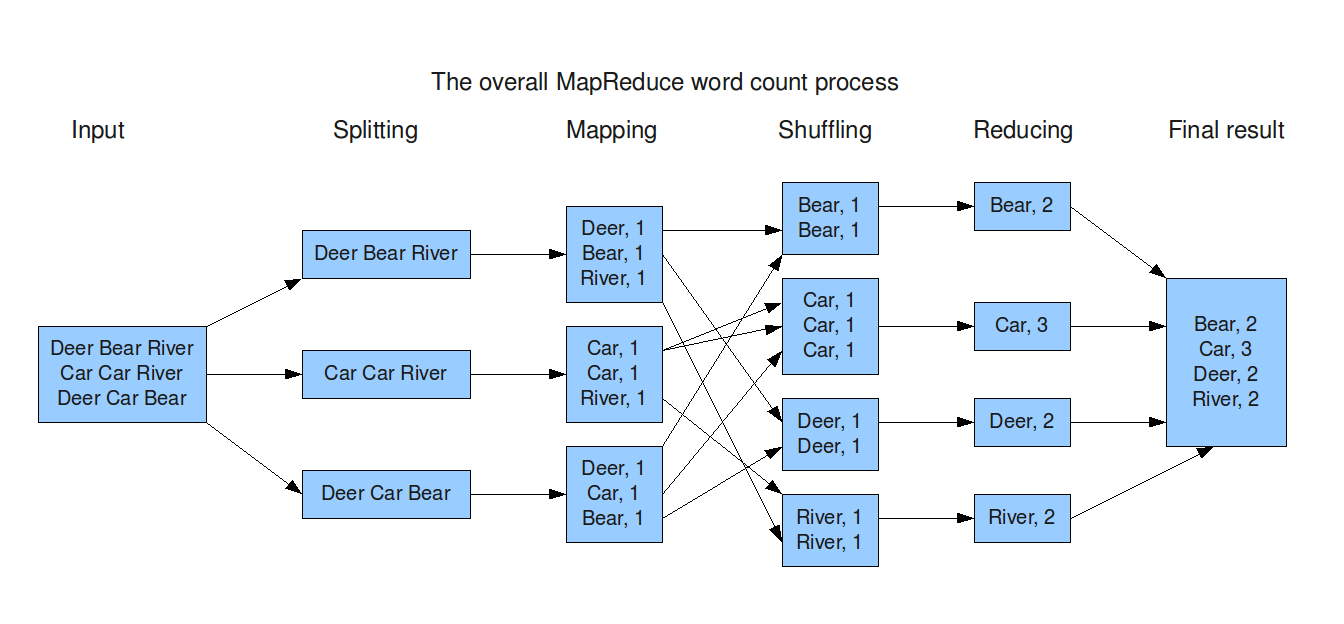

In [112]:
(words.collect())[:10]

['the',
 'african',
 'institute',
 'for',
 'mathematical',
 'sciences',
 '(aims)',
 'is',
 'a',
 'pan-african']

In [113]:
df = words.map(lambda x: (x, 1)).reduceByKey(lambda a, b: a + b)
df.collect()

[('for', 3),
 ('sciences', 1),
 ('pan-african', 1),
 ('network', 2),
 ('of', 6),
 ('centres', 1),
 ('excellence', 1),
 ('sciences,', 2),
 ('research,', 1),
 ('and', 11),
 ('public', 2),
 ('science,', 1),
 ('engineering,', 1),
 ('', 15),
 ('founded', 1),
 ('south', 1),
 ('by', 1),
 ('prof', 1),
 ('replicated', 1),
 ('senegal,', 1),
 ('ghana,', 1),
 ('cameroon', 2),
 ('transformation', 2),
 ('human', 1),
 ('capital);', 1),
 ('continent’s', 1),
 ('emergence', 1),
 ('youth', 1),
 ('are', 1),
 ('at', 1),
 ('heart', 1),
 ('innovation', 1),
 ('set', 1),
 ('expertly', 1),
 ('to', 5),
 ('learners', 1),
 ('with', 3),
 ('unique', 1),
 ('experience', 1),
 ('continent', 1),
 ('master’s', 2),
 ('option', 1),
 ('industry,', 1),
 ('machine', 1),
 ('as', 2),
 ('well', 1),
 ('conducting', 1),
 ('industry', 1),
 ('initiative', 1),
 ('teacher', 1),
 ('equally', 1),
 ('africa,', 1),
 ('tank', 1),
 ('looking', 1),
 ('einstein', 1),
 ('forum', 1),
 ('stage', 1),
 ('the', 11),
 ('african', 2),
 ('institute', 

In [114]:
# df2 = sc.createDataFrame(words.collect(), ['word', 'count'])
# df2.limit(10).show()

In [115]:
# df2.toPandas()

In [116]:
# using flatMap
words = text_rdd.flatMap(lambda x: x.replace(".", " ").split(" "))
words.collect()[:6]

['The', 'African', 'Institute', 'for', 'Mathematical', 'Sciences']

### GroupByKey

Transformation / Wide: Group the values for each key in the original RDD. Create a new pair where the original key corresponds to this collected group of values.

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/TlWRGr2.png?raw=1)

In [117]:
rdd = sc.parallelize([('B',5),('B',4),('A',3),('A',2),('A',1)])
rdd = rdd.groupByKey()
[(j[0], list(j[1])) for j in rdd.collect()]

[('B', [5, 4]), ('A', [3, 2, 1])]

### Join

Transformation / Wide: Return a new RDD containing all pairs of elements having the same key in the original RDDs

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/YXL42Nl.png?raw=1)

`join`: Joining two RDDs

In [118]:
x = sc.parallelize([("a", 1), ("b", 2)])
y = sc.parallelize([("a", 3), ("a", 4), ("b", 5)])
x.join(y).collect()

[('b', (2, 5)), ('a', (1, 3)), ('a', (1, 4))]

### Distinct

Transformation / Wide: Return a new RDD containing distinct items from the original RDD (omitting all duplicates)

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/Vqgy2a4.png?raw=1)

In [119]:
rdd = sc.parallelize([1,2,3,3,4])
rdd.distinct().collect()

[1, 2, 3, 4]

In [120]:
{1,2,3,3,4}

{1, 2, 3, 4}

`KeyBy`

Transformation / Narrow: Create a Pair RDD, forming one pair for each item in the original RDD. The pair’s key is calculated from the value via a user-supplied function.

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/nqYhDW5.png?raw=1)

In [121]:
'John'[1]

'o'

In [122]:
rdd = sc.parallelize(['John', 'Fred', 'Anna', 'James'])
rdd.keyBy(lambda w: w[0]).collect()

[('J', 'John'), ('F', 'Fred'), ('A', 'Anna'), ('J', 'James')]

## Actions

### Map-Reduce operation

Action / To Driver: Aggregate all the elements of the RDD by applying a user function pairwise to elements and partial results, and return a result to the driver

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/R72uzwX.png?raw=1)

In [123]:
from operator import add
rdd = sc.parallelize(list(range(8)))
rdd.collect()

[0, 1, 2, 3, 4, 5, 6, 7]

In [124]:
rdd.map(lambda x: x ** 2).reduce(add) # reduce is an action!

140

### Max, Min, Sum, Mean, Variance, Stdev

Action / To Driver: Compute the respective function (maximum value, minimum value, sum, mean, variance, or standard deviation) from a numeric RDD

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/HUCtib1.png?raw=1)

### CountByKey

Action / To Driver: Return a map of keys and counts of their occurrences in the RDD

![](https://github.com/pnavaro/big-data/blob/master/notebooks/images/jvQTGv6.png?raw=1)

In [125]:
rdd = sc.parallelize([('J', 'James'), ('F','Fred'),
                    ('A','Anna'), ('J','John')])

rdd.countByKey()

defaultdict(int, {'J': 2, 'F': 1, 'A': 1})

In [126]:
# Stop the local spark cluster
# sc.stop()

In [127]:
import numpy as np
x = np.random.randint(0, 100, 100)
# rdd.collect()
x_rdd = sc.parallelize(x)
x_rdd.getNumPartitions()

16

* `getNumPartitions`: how many partitions a DataFrame or RDD has
* `repartition`: change the number of partitions of an RDD or DataFrame

In [128]:
xx = x_rdd.repartition(5)
xx.getNumPartitions()

5

`union`: combine two RDDs or DataFrames with the same schema into one.

In [129]:
x1 = sc.parallelize([("d", 5)])
x2 = sc.parallelize([("d", 9)])
x1.union(x2).collect()

[('d', 5), ('d', 9)]

`intersection`: chooses common elements between two sets

In [130]:
rddA = sc.parallelize([1, 2, 3, 4])
rddB = sc.parallelize([3, 4, 5, 6])
rddA.intersection(rddB).collect()

[3, 4]

**Exercises:**

**Exercise 1.** Filter out empty strings from the RDD of the WhoAreWe.txt file. Remove empty `.`, `blank space` (more than 1 spaces), `'s`, `:`, `;`, `-`, before counting using map functions and reduce. Everything should be in lower case (You know why?).

```
['The African Institute for Mathematical Sciences (AIMS) is a pan-African network of Centres of Excellence for postgraduate training in mathematical sciences, research, and public engagement in Science, Technology, Engineering, and Mathematics. Founded in 2003 in South Africa by acclaimed physicist Prof Neil Turok and later replicated in Senegal, Ghana, Cameroon and Rwanda, AIMS is leading Africa’s socio-economic transformation through:',
 '',
 'Innovative scientific training (the development of human capital);',
 '',
 'Technological advances and cutting-edge scientific discoveries; and',
 '',
 'Public engagement for the continent’s scientific emergence.',
 ...
 ```

In [58]:
text_rdd = sc.textFile("./Datasets/WhoAreWe.txt")
rdd=  text_rdd.map(lambda x: x.replace(".", " ").split(" ")).collect()

**Exercise 2.** Import the following US Stock data `Datasets/pystock-data/2015/20150323.tar.gz` in python using pyspark and the following function.

In [59]:
import tarfile

def extract_tar_gz_paths(path):
    file_paths = []
    with tarfile.open(path, "r:gz") as tar:
        for member in tar.getmembers():
            if member.isfile():
                file_paths.append(member.name)
    return file_paths


In [60]:
path = "pystock-data/pystock-data/2015/20150323.tar.gz"
paths = extract_tar_gz_paths(path)

In [61]:
paths

['symbols.txt', 'prices.csv', 'reports.csv']

After importing the 3 files in python:
1. Analyse each of them
2. Find any relationship between the 3 files
3. Make some exploratory data analyses (time series chart, histograms, rate of change, etc.)

In [62]:
sc.stop()

## Tutorial
Use the above to import all decompress and import files by year. Merge what is mergeable. Play with the data.